In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import torchvision.transforms as transforms
import scipy.stats

In [2]:
plt.rcParams['figure.figsize'] = [16.18, 10]

In [3]:
transform = transforms.Compose(
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=40,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=40,
                                         shuffle=False, num_workers=2)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

Sneaker Sneaker   Bag Sandal


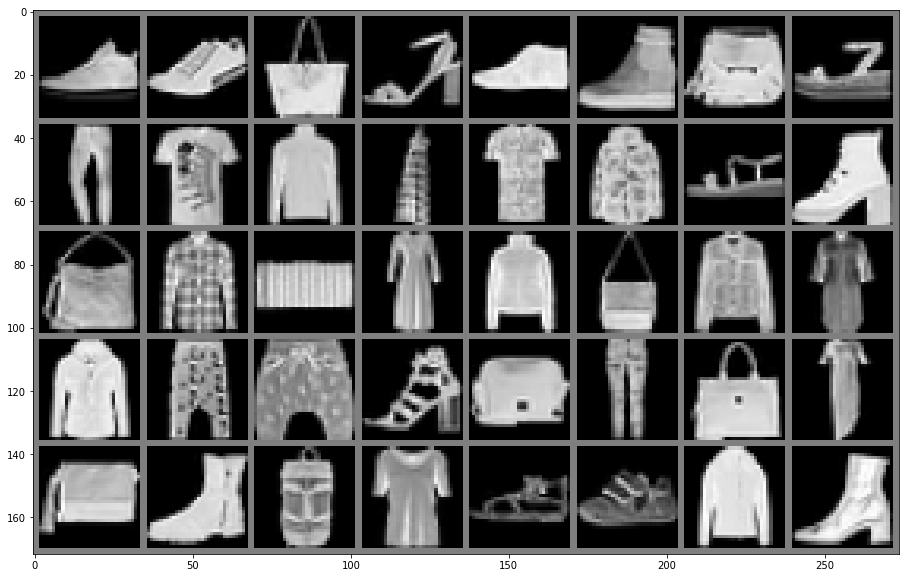

Process Process-2:
Process Process-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/matt_rounds/miniconda2/envs/XA3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/matt_rounds/miniconda2/envs/XA3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/matt_rounds/miniconda2/envs/XA3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/matt_rounds/miniconda2/envs/XA3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/matt_rounds/miniconda2/envs/XA3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/Users/matt_rounds/miniconda2/envs/XA3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
 

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [46]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        #self.conv1 = nn.Conv2d(1, 6, 5)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc0 = nn.Linear(1024,200)
        self.fc1 = nn.Linear(200,200)
        self.fc2 = nn.Linear(200,200)
        self.fc3 = nn.Linear(200,200)
        self.fc4 = nn.Linear(200,10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        #x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        #x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc0(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [52]:
ents = [torch.zeros((200,1024,7500)),torch.zeros((200,200,7500)),torch.zeros((200,200,7500)),torch.zeros((200,200,7500)),torch.zeros((10,200,7500))]

for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        for indx, j in enumerate(net.children()):
            grad = j.weight.grad
            #normed_gh = torch.histc(grad) / torch.sum(torch.histc(grad))
            #entropy = scipy.stats.entropy(normed_gh)
            if epoch == 0:
                ents[indx][:,:,i] = grad
            elif epoch == 1:
                ents[indx][:,:,i+1499] = grad
            elif epoch == 2:
                ents[indx][:,:,i+2999] = grad
            elif epoch == 3:
                ents[indx][:,:,i+4499] = grad
            elif epoch == 4:
                ents[indx][:,:,i+5999] = grad

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 2.290
[1,   400] loss: 2.214
[1,   600] loss: 1.718
[1,   800] loss: 1.102
[1,  1000] loss: 0.868
[1,  1200] loss: 0.783
[1,  1400] loss: 0.726
[2,   200] loss: 0.656
[2,   400] loss: 0.635
[2,   600] loss: 0.604
[2,   800] loss: 0.576
[2,  1000] loss: 0.570
[2,  1200] loss: 0.564
[2,  1400] loss: 0.556
[3,   200] loss: 0.540
[3,   400] loss: 0.519
[3,   600] loss: 0.502
[3,   800] loss: 0.500
[3,  1000] loss: 0.485
[3,  1200] loss: 0.469
[3,  1400] loss: 0.486
[4,   200] loss: 0.484
[4,   400] loss: 0.462
[4,   600] loss: 0.453
[4,   800] loss: 0.450
[4,  1000] loss: 0.449
[4,  1200] loss: 0.430
[4,  1400] loss: 0.430
[5,   200] loss: 0.424
[5,   400] loss: 0.429
[5,   600] loss: 0.435
[5,   800] loss: 0.408
[5,  1000] loss: 0.420
[5,  1200] loss: 0.416
[5,  1400] loss: 0.404
Finished Training


In [53]:
flattened_ents = []

for layer in ents:
    flattened_ents.append(layer.view(-1,7500))

In [54]:
ENTS = []

for i, fl in enumerate(flattened_ents):
    print(fl.shape[0])
    epoch = np.zeros((fl.shape[0],5))
    for j in range(fl.shape[0]):
        for k in range(5): #per epoch
            lb = k*1500
            vector = fl[j, lb:lb+1500]
            normed_gh = torch.histc(vector) / torch.sum(torch.histc(vector))
            epoch[j,k] = float(scipy.stats.entropy(normed_gh.numpy()))
    ENTS.append(epoch)
        

204800
40000
40000
40000
2000


In [55]:
names = {}

for i, name in enumerate(net.named_children()):
    names[i] = name

In [56]:
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

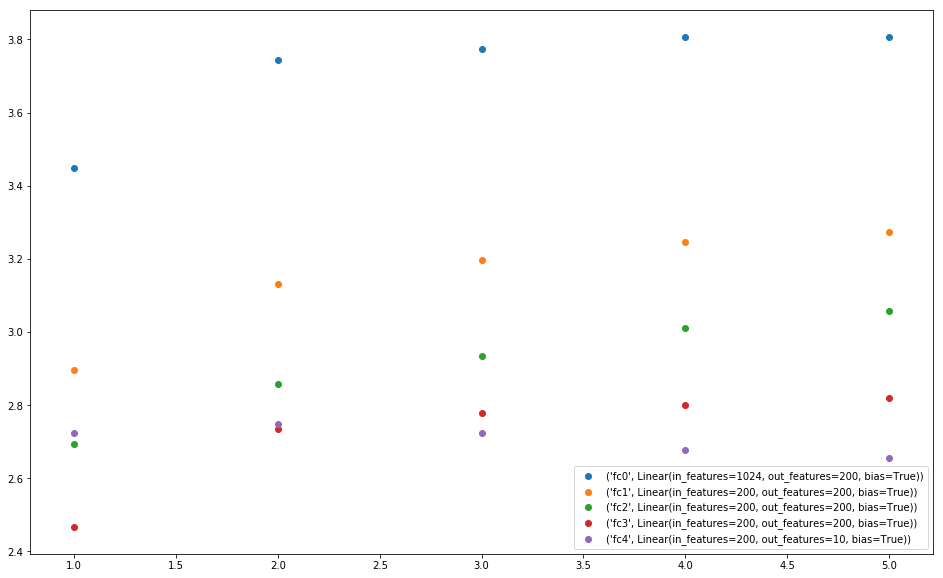

In [58]:
x = range(1,6)
for k in range(len(ENTS)):
    error = np.divide(np.std(ENTS[k],axis=0), ENTS[k].shape[0])
    plt.scatter(x, np.mean(ENTS[k], axis=0), label = names[k])
    
plt.legend()
plt.show()